In [7]:
from preprocess import Preprocess
from kmeans import KMeansClustering
from lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [8]:
data = Preprocess.open_pickle("F:\Development\smart_rejector_for_hate_speech\/twitter_data.pkl")
filtered_data = Preprocess.filter_waseem_hovy(X=data, label='none')
tweets = [x['text'] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 16089
INFO:root:After applying filters: 11036
INFO:root:Data length after removing invalid tweets: 3801
INFO:root:Explained variance of the SVD step: 23%


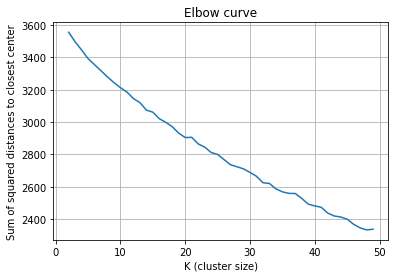

In [9]:
%matplotlib inline
# Lower values are better
km.plot_elbow_curve(max_k=50, X=X)

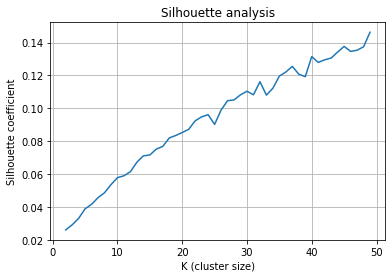

In [10]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

In [11]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 like looks feel people just know pretty kat good girls

Cluster 1:
 kat andre cook hope ca fuck deserve competition people face

Cluster 2:
 just got make want think women time gamergate did said

Cluster 3:
 going colin girls oh think really does did round food

Cluster 4:
 women people gamergate time need things sure work harassment got



In [12]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

Cluster 0: most representative sample indices: [3564 1579 3044 2906 1167]
{'text': 'are these two serious !  #mkr', 'label': 'none'}

{'text': 'its #mkr not #comedinewithme', 'label': 'none'}

{'text': 'that is a first.', 'label': 'none'}

{'text': 'you are not alone in this. you are never alone in this.', 'label': 'none'}

{'text': 'here we go again ,  again. #mkr', 'label': 'none'}


Cluster 1: most representative sample indices: [  88 3136  950 2155 3665]
{'text': '#mkr #karma kat and andre', 'label': 'none'}

{'text': 'can kat and andre go already ?  #theycantcook #mkr', 'label': 'none'}

{'text': '#mkr  it should have been kat and andre #flogs !', 'label': 'none'}

{'text': 'how can they get away with that. kat &amp; andre are cunts. #mkr', 'label': 'none'}

{'text': 'kat + andre = retards  #mkr', 'label': 'none'}


Cluster 2: most representative sample indices: [3141 1977 2741 2958 2976]
{'text': 'if u like #mkr ,  i like u', 'label': 'none'}

{'text': 'she walks like a demented 

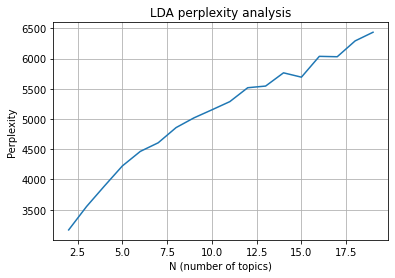

In [17]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=20, X=X)

In [ ]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()